In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from tabs import TorsionInfoList, GetTorsionProfilesFromMDTraj
import mdtraj as md

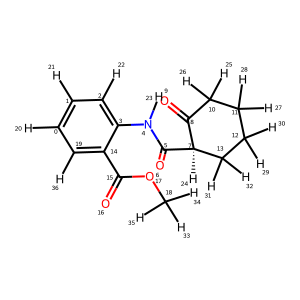

In [2]:
mol = Chem.AddHs(Chem.MolFromSmiles("[H]c1c([H])c([H])c(N([H])C(=O)[C@@]2([H])C(=O)C([H])([H])C([H])([H])C([H])([H])C2([H])[H])c(C(=O)OC([H])([H])[H])c1[H]"))
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 300,300
mol

In [3]:
torInfo = TorsionInfoList.WithTorsionLibs(mol)

In [4]:
torInfo.smarts

['[O:1]=[C:2]!@;-[O:3]~[C:4]',
 '[$(C=O):1][NX3:2]!@;-[!#1:3][!#1:4]',
 '[O:1]=[CX3:2]!@;-[NX3H1:3][!#1:4]',
 '[C:1][CX4:2]!@;-[CX3:3]=[O:4]',
 '[$([cH0]!@;-[*^2]):1][c:2]([cH1])!@[CX3:3]=[O:4]',
 '[!#1;r{5-8}:1]@[C^2;r{5-6}:2]@;-[C;r{5-6}:3]@[!#1;r{5-8}:4]',
 '[!#1;r{5-8}:1]@[C^2;r{5-6}:2]@;-[C;r{5-6}:3]@[!#1;r{5-8}:4]',
 '[C^2,c,x4;r{5-8}:1]@[CX4;r{5-8}:2]@;-[CX4;r{5-8}:3]@[!#1;r{5-8}:4]',
 '[C^2,c,x4;r{5-8}:1]@[CX4;r{5-8}:2]@;-[CX4;r{5-8}:3]@[!#1;r{5-8}:4]',
 '[!#1;r{5-8}:1]@[CX4;r{5-8}:2]@;-[CX4;r{5-8}:3]@[!#1;r{5-8}:4]',
 '[!#1;r{5-8}:1]@[CX4;r{5-8}:2]@;-[CX4;r{5-8}:3]@[!#1;r{5-8}:4]']

In [5]:
torInfo.indices

[[16, 15, 17, 18],
 [5, 4, 3, 2],
 [6, 5, 4, 3],
 [8, 7, 5, 6],
 [3, 14, 15, 16],
 [7, 8, 10, 11],
 [10, 8, 7, 13],
 [8, 7, 13, 12],
 [8, 10, 11, 12],
 [7, 13, 12, 11],
 [10, 11, 12, 13]]

In [6]:
torInfo.multiplicities

[1, 4, 1, 3, 2, 3, 3, 6, 6, 3, 3]

In [7]:
torInfo.bounds

[array([3.14159265]),
 array([0.78539816, 2.35619449, 3.92699082, 5.49778714]),
 array([3.14159265]),
 array([1.04719755, 3.14159265, 5.21853446]),
 array([1.57079633, 4.71238898]),
 array([0.       , 2.0943951, 4.1887902]),
 array([0.       , 2.0943951, 4.1887902]),
 array([0.52359878, 1.57079633, 2.60054059, 3.64773814, 4.71238898,
        5.75958653]),
 array([0.52359878, 1.57079633, 2.60054059, 3.64773814, 4.71238898,
        5.75958653]),
 array([0.       , 2.0943951, 4.1887902]),
 array([0.       , 2.0943951, 4.1887902])]

In [8]:
torInfo.torsionTypes

[<TorsionType.REGULAR: 1>,
 <TorsionType.REGULAR: 1>,
 <TorsionType.REGULAR: 1>,
 <TorsionType.REGULAR: 1>,
 <TorsionType.REGULAR: 1>,
 <TorsionType.SMALL_RING: 2>,
 <TorsionType.SMALL_RING: 2>,
 <TorsionType.SMALL_RING: 2>,
 <TorsionType.SMALL_RING: 2>,
 <TorsionType.SMALL_RING: 2>,
 <TorsionType.SMALL_RING: 2>]

In [9]:
customProfiles = GetTorsionProfilesFromMDTraj(md.load("../Data/CustomTABS/conformational_ensemble_smiles_id_0_openff200_CO_0_161311_output_stripped.h5"), torInfo.indices)
customProfiles.shape

/localhome/braunje/.conda/envs/tabs/lib/python3.10/site-packages/mdtraj/core/trajectory.py:441: UserWarning: top= kwargs ignored since this file parser does not support it
  warnings.warn("top= kwargs ignored since this file parser does not support it")


(250000, 11)

In [10]:
import matplotlib.pyplot as plt
import numpy as np

In [11]:
from tabs import fits

In [12]:
binsize = np.pi*2/36
yHists, yHistsCount, xHist = fits.ComputeTorsionHistograms(customProfiles,binsize)

In [13]:
coeffs, peaks = fits.ComputeGaussianFit(xHist,yHists[4],yHistsCount[4],binsize)

id: 0
id: 1
id: 2
id: 3
id: 4
id: 5
id: 6
id: 7
id: 8
id: 9
id: 10
[3.097344869736416]
[3.1858404374431704, 6.283185307179586]
[3.097344869736416]
[3.2743360051499253, 0.8849556770675473]
[1.8584069218418495, 3.097344869736416, 4.424778385337737]
[3.097344869736416, 6.194689739472832]
[3.2743360051499253, 0.0]
[2.9203537343229065, 0.0]
[3.097344869736416, 6.283185307179586]
[3.3628315728566798, 6.194689739472832]
[3.1858404374431704, 6.283185307179586]


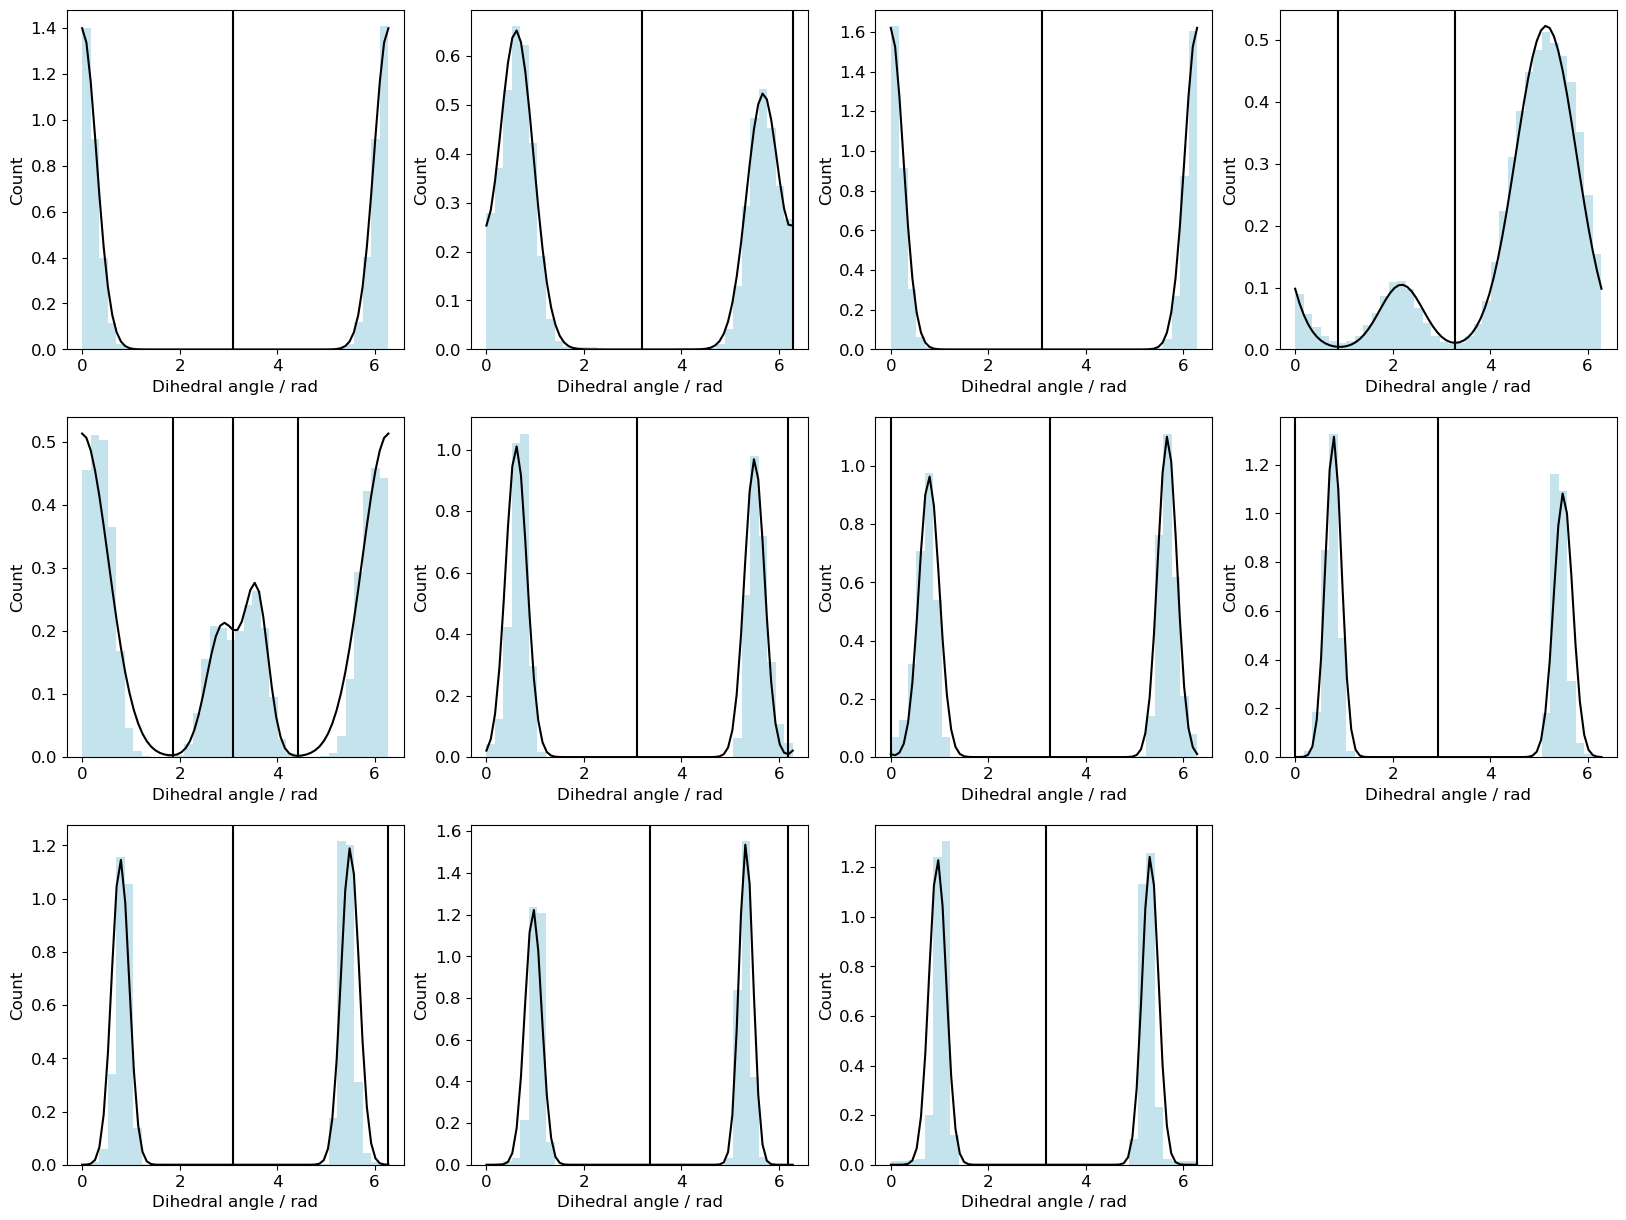

In [14]:
torInfo2 = TorsionInfoList.WithCustomTorsions(mol, torInfo.indices, customProfiles, showFits=True, excludePeaks=1e-4, prominence=1e-4, mergePeaks=False)